In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_breast_cancer

In [2]:
list1 = ['Id_number', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Epi_Cell_Size', 
        'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class' ]

df = pd.read_csv("breast-cancer-wisconsin.data")

In [3]:
df.columns = list1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Id_number                698 non-null int64
Clump_Thickness          698 non-null int64
Uniformity_Cell_Size     698 non-null int64
Uniformity_Cell_Shape    698 non-null int64
Marginal_Adhesion        698 non-null int64
Epi_Cell_Size            698 non-null int64
Bare_Nuclei              698 non-null object
Bland_Chromatin          698 non-null int64
Normal_Nucleoli          698 non-null int64
Mitoses                  698 non-null int64
Class                    698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
df.shape

(698, 11)

In [6]:
df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
df.head(5)

,Id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4


In [8]:
df.describe()

,Id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,682.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.548387,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,3.645226,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
cleanup_nums = {"Class": {4 : 1, 2: 0}}
df.replace(cleanup_nums, inplace=True)

In [11]:
df.head(10)

,Id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,0
1,1015425,3,1,1,1,2,2.0,3,1,1,0
2,1016277,6,8,8,1,3,4.0,3,7,1,0
3,1017023,4,1,1,3,2,1.0,3,1,1,0
4,1017122,8,10,10,8,7,10.0,9,7,1,1
5,1018099,1,1,1,1,2,10.0,3,1,1,0
6,1018561,2,1,2,1,2,1.0,3,1,1,0
7,1033078,2,1,1,1,2,1.0,1,1,5,0
8,1033078,4,2,1,1,2,1.0,2,1,1,0
9,1035283,1,1,1,1,1,1.0,3,1,1,0


In [12]:
# Select categorical columns irrespective of cardinality (convenient for label encoding)
categorical_cols = [cname for cname in df.columns if 
                    df[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]

print(categorical_cols)
print(numerical_cols)

[]
['Id_number', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Epi_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']


In [13]:
# Let's write a function to print the total percentage of the missing values.
#(this can be a good exercise for beginners to try to write simple functions like this.)

def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [14]:
missing_percentage(df)

,Total,Percent
Bare_Nuclei,16,2.29
Class,0,0.00
Mitoses,0,0.00
Normal_Nucleoli,0,0.00
Bland_Chromatin,0,0.00
Epi_Cell_Size,0,0.00
Marginal_Adhesion,0,0.00
Uniformity_Cell_Shape,0,0.00
Uniformity_Cell_Size,0,0.00
Clump_Thickness,0,0.00


In [15]:
print(df.groupby('Class').size())

Class
0    457
1    241
dtype: int64


In [16]:
# Missing value treatment strategies
# from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# df  = df.fillna(0)

# Preprocessing/imputation for numerical data
numerical_imputer = SimpleImputer(strategy='median')
#numerical_imputer1 = IterativeImputer(max_iter=10, random_state=0)

# Preprocessing/imputation for categorical data
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute

df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
#df[numerical_cols] = numerical_imputer1.fit_transform(df[numerical_cols])

#df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])    

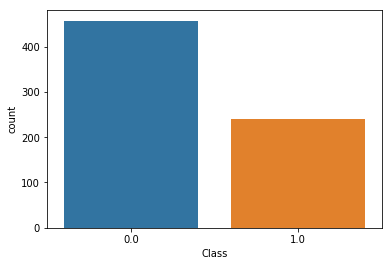

In [19]:
# Plot outcome classes, to check for class imbalance

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['Class'], label="Count")

In [20]:
df.dtypes

Id_number                float64
Clump_Thickness          float64
Uniformity_Cell_Size     float64
Uniformity_Cell_Shape    float64
Marginal_Adhesion        float64
Epi_Cell_Size            float64
Bare_Nuclei              float64
Bland_Chromatin          float64
Normal_Nucleoli          float64
Mitoses                  float64
Class                    float64
dtype: object

In [21]:
col = list(df.columns)
col.remove("Class")
col.remove("Id_number")
# col.remove("Uniformity_Cell_Size")

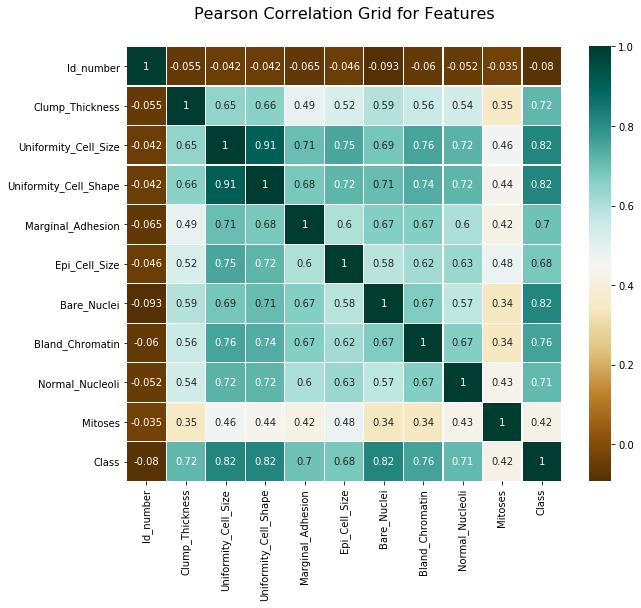

In [22]:
# Correlation among Independent Variables/Features, to see relationships

import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.BrBG

plt.figure(figsize=(10,8))
plt.title('Pearson Correlation Grid for Features', y=1.05, size=16)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

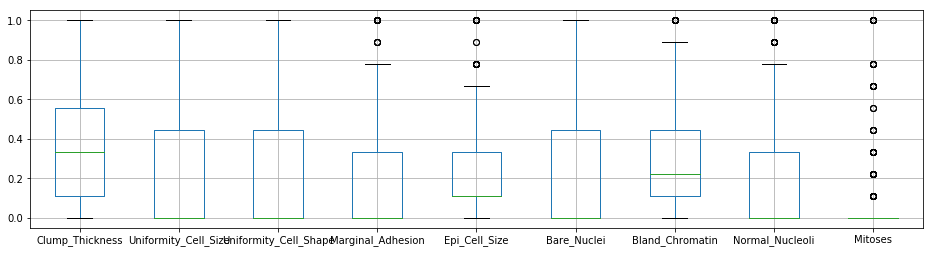

In [23]:
#Generate boxplots for all the numeric variables to compare side by side, and check for outliers

from sklearn.preprocessing import MinMaxScaler

#df2 = df1[numerical_cols]

x = df[col].values #returns a numpy array

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

x_scaled = min_max_scaler.fit_transform(x)

df1 = pd.DataFrame(x_scaled, columns = df[col].columns)

boxplot = df1.boxplot(figsize=[16,4])

In [24]:
# Minmax Scaling for better fit after outlier treatment

from sklearn.preprocessing import MinMaxScaler

df2 = df[col].values #returns a numpy array for outlier untreated numeric cols
#x = df1.values #returns a numpy array for outlier treated numeric cols

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

x_scaled = min_max_scaler.fit_transform(df2)

df3 = pd.DataFrame(x_scaled, columns = df[col].columns)


In [25]:
df3.head()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.111111,-0.333333,-0.333333,-0.111111,0.333333,1.000000,-0.555556,-0.777778,-1.0
1,-0.555556,-1.000000,-1.000000,-1.000000,-0.777778,-0.777778,-0.555556,-1.000000,-1.0
2,0.111111,0.555556,0.555556,-1.000000,-0.555556,-0.333333,-0.555556,0.333333,-1.0
3,-0.333333,-1.000000,-1.000000,-0.555556,-0.777778,-1.000000,-0.555556,-1.000000,-1.0
4,0.555556,1.000000,1.000000,0.555556,0.333333,1.000000,0.777778,0.333333,-1.0


In [26]:
X = df[col].values
Y = df['Class'].values

In [27]:
# Train-Test split

train_x, test_x, train_y,test_y = train_test_split(X, Y, test_size=0.25, random_state=1000)


In [28]:
## Creating Decision Tree

dt = DecisionTreeClassifier(max_depth=None, criterion='gini', max_features=7, min_impurity_decrease=0.0, random_state=0)

dt.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [29]:
# View predicted classes

pred_class = dt.predict(test_x)
pred_prob  = dt.predict_proba(test_x)
print(pred_class[0:4])
print(pred_prob[0:4])

[1. 0. 0. 0.]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [30]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, pred_class)

array([[113,   3],
       [  7,  52]], dtype=int64)

In [31]:
# Print out above numbers from 2*2 grid

tn=confusion_matrix(test_y, pred_class)[0,0]
tp=confusion_matrix(test_y, pred_class)[1,1]
fn=confusion_matrix(test_y, pred_class)[1,0]
fp=confusion_matrix(test_y, pred_class)[0,1]

print(tn, fp, fn, tp)

113 3 7 52


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(test_y, pred_class))
print(precision_score(test_y, pred_class))
print(recall_score(test_y, pred_class))

0.9428571428571428
0.9454545454545454
0.8813559322033898


In [33]:
#RoC Value

from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, pred_prob[0:,1:])

0.9277469316189362

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
feature_imp = pd.DataFrame(sorted(zip(dt.feature_importances_, col), reverse=True), columns=['Value','Feature'])


In [35]:
# Feature Importance table
feature_imp

,Value,Feature
0,0.756801,Uniformity_Cell_Size
1,0.107288,Bare_Nuclei
2,0.064771,Clump_Thickness
3,0.027214,Marginal_Adhesion
4,0.014537,Bland_Chromatin
5,0.012656,Normal_Nucleoli
6,0.008427,Epi_Cell_Size
7,0.008307,Uniformity_Cell_Shape
8,0.000000,Mitoses


In [36]:
col1 = list(df.columns)
col1.remove("Class")
col1.remove("Id_number")
col1.remove("Uniformity_Cell_Size")

In [48]:
col1

['Clump_Thickness',
 'Uniformity_Cell_Shape',
 'Marginal_Adhesion',
 'Epi_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses']

In [49]:
X1 = df[col1].values
Y1 = df['Class'].values

In [50]:
# Train-Test split

train_x, test_x, train_y,test_y = train_test_split(X1, Y1, test_size=0.25, random_state=1000)

In [51]:
## Creating Decision Tree

dt1 = DecisionTreeClassifier(max_depth=None, criterion='entropy', max_features=7, min_impurity_decrease=0.0, random_state=0)

dt1.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [52]:
# View predicted classes

pred_class1 = dt1.predict(test_x)
pred_prob  = dt1.predict_proba(test_x)
print(pred_class[0:4])
print(pred_prob[0:4])

[1. 0. 0. 0.]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [53]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, pred_class1)

array([[110,   6],
       [  8,  51]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(test_y, pred_class1))
print(precision_score(test_y, pred_class1))
print(recall_score(test_y, pred_class1))

0.92
0.8947368421052632
0.864406779661017


In [54]:
#RoC Value

from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, pred_prob[0:,1:])

0.9063413208649912

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
feature_imp1 = pd.DataFrame(sorted(zip(dt1.feature_importances_, col1), reverse=True), columns=['Value','Feature'])


In [56]:
# Feature Importance table
feature_imp1

,Value,Feature
0,0.603608,Uniformity_Cell_Shape
1,0.173590,Bare_Nuclei
2,0.083220,Clump_Thickness
3,0.077828,Bland_Chromatin
4,0.031525,Normal_Nucleoli
5,0.030229,Marginal_Adhesion
6,0.000000,Mitoses
7,0.000000,Epi_Cell_Size


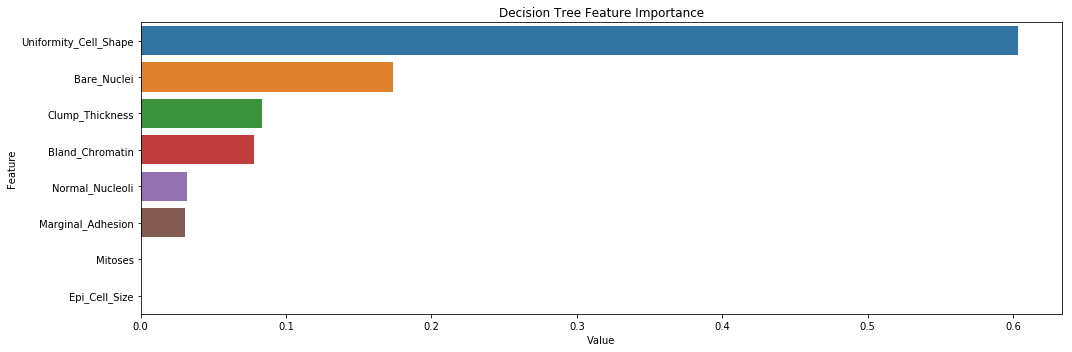

In [57]:
# Feature Importance plot
plt.figure(figsize=(15, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp1.sort_values(by="Value", ascending=False))
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

In [80]:
%%time
# Recursive feature elimination using RFE, to select top 'x' features

from sklearn.feature_selection import RFE

estimator = dt1

selector = RFE(estimator, 7, step=1)
selector = selector.fit(train_x, train_y)

X_trainK = selector.fit_transform(X1, Y1)



Wall time: 5.98 ms


In [81]:
#A quick look at the rankings provided to the features by RFE
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 2])

In [ ]:
# Train-Test split

train_x, test_x, train_y,test_y = train_test_split(X1, Y1, test_size=0.25, random_state=1000)

In [83]:
# Build and fit Logistic Regression model, with/without timer; to try out covergence tuning using loss function and iterations

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression

#class_weights = {0: 1, 1: 4}

LR = make_pipeline(RobustScaler(), LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                                       intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', 
                                                       max_iter=300, multi_class='auto', verbose=0, warm_start=False, n_jobs=1, 
                                                       l1_ratio=None))

#solver='liblinear', 'lbfgs'
LR_model = LR.fit(train_x, train_y.ravel())

LR_model

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=300,
                                    multi_class='auto', n_jobs=1, penalty='l2',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [59]:
pred_class = LR_model.predict(test_x)
pred_prob  = LR_model.predict_proba(test_x)
print(pred_class[0:4])
print(pred_prob[0:4])

[1. 0. 0. 0.]
[[0.06407863 0.93592137]
 [0.98179286 0.01820714]
 [0.9716456  0.0283544 ]
 [0.99055623 0.00944377]]


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_class)

array([[113,   3],
       [  2,  57]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(test_y, pred_class))
print(precision_score(test_y, pred_class))
print(recall_score(test_y, pred_class))

0.9714285714285714
0.95
0.9661016949152542


In [62]:
%%time

from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

# C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
# Effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]

# Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']

# Choosing the solver/ loss optimizer
solver = ['liblinear', 'saga']

# Choose a cross validation strategy 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .33)

# Setting param for param_grid in GridSearchCV 
param = {'penalty': penalties, 'C': C_vals, 'solver': solver}


# Calling on GridSearchCV object 
grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid = param,
                    scoring = 'accuracy',
                    n_jobs =-1,
                    cv = cv)

# Fitting the model
grid.fit(X, Y.ravel())

Wall time: 8.47 s


In [63]:
# Getting the best of everything 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.9640692640692641
{'C': 0.9, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [65]:
# Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,Y)

0.9684813753581661

In [67]:
%%time

# Grid Search with Support Vector Classifier (SVC); does not work without scaling

from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5,10] # Penalty parameter C for the error term. 

gammas = [0.0001,0.001, 0.01, 0.1, 1] # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

kernels = ['rbf', 'linear', 'sigmoid'] # Specifies the kernel type to be used in the algorithm.

param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

grid_search = GridSearchCV(SVC(probability=True), 
                           param_grid, 
                           n_jobs =-1,
                           cv=cv)

grid_search.fit(X, Y.ravel())

Wall time: 7.99 s


In [68]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.9640692640692641
{'C': 0.9, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [69]:
# Using the best parameters from the grid-search.
svc_grid = grid.best_estimator_
svc_grid.score(X, Y)

0.9684813753581661